In [78]:
% matplotlib inline

In [79]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot


pandas.set_option('display.max_columns', 100)

seaborn.set_context(context='notebook')
seaborn.set_style(style='ticks')

In [80]:
pitch_map = {
    'AB': 'Automatic Ball',
    'AS': 'Automatic Strike',
    'CH': 'Changeup',
    'CU': 'Curveball',
    'EP': 'Eephus',
    'FC': 'Cutter',
    'FF': 'Four-Seam Fastball',
    'FO': 'Forkball',
    'FS': 'Splitter',
    'FT': 'Two-Seam Fastball (synonymous with SI)',
    'GY': 'Gyroball',
    'IN': 'Intentional Ball',
    'KC': 'Knuckle Curve',
    'KN': 'Knuckleball',
    'NP': 'No Pitch',
    'PO': 'Pitchout',
    'SC': 'Screwball',
    'SI': 'Sinker (synonymous with FT)',
    'SL': 'Slider',
    'UN': 'Unknown',
}

In [81]:
bundy_df = pandas.read_csv('data/bundy.csv', na_values='null')
bundy_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value
0,FF,2017-04-26,91.7,-1.1687,6.0046,Dylan Bundy,489149,605164,double,hit_into_play_no_out,NaN,NaN,NaN,NaN,8.0,Logan Morrison doubles (2) on a line drive to ...,R,L,R,BAL,TB,X,NaN,line_drive,0,0,2017,0.4413,1.6626,-0.1467,1.9233,NaN,NaN,NaN,1,7,Top,50.94,119.28,NaN,NaN,456078.0,NaN,170427_011859,NaN,NaN,NaN,NaN,NaN,NaN,3.8426,1.5897,260.0,98.1,14.577,90.822,2380.0,5.911,490417,605164.0,456078.0,448801.0,570731.0,592518.0,475247.0,547957.0,430945.0,452234.0,54.5861,0.610,0.644,1.25,1.0,1.0,1.0
1,CU,2017-04-26,76.4,-0.9274,6.1063,Dylan Bundy,519306,605164,field_out,hit_into_play,NaN,NaN,NaN,NaN,9.0,Steven Souza Jr. lines out sharply to center...,R,R,R,BAL,TB,X,8.0,line_drive,1,2,2017,-1.3520,-0.6003,0.5593,1.9510,NaN,NaN,NaN,0,7,Top,125.51,50.60,NaN,NaN,456078.0,NaN,170427_011804,NaN,NaN,NaN,NaN,NaN,NaN,3.9246,1.6277,359.0,107.9,19.940,74.958,2417.0,5.476,490417,605164.0,456078.0,448801.0,570731.0,592518.0,475247.0,547957.0,430945.0,452234.0,55.0215,0.881,1.416,0.00,1.0,0.0,0.0
2,FF,2017-04-26,91.8,-1.0764,6.0778,Dylan Bundy,519306,605164,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,R,R,R,BAL,TB,S,NaN,NaN,1,2,2017,-0.0709,1.9388,-0.0006,2.6503,NaN,NaN,NaN,0,7,Top,NaN,NaN,NaN,NaN,456078.0,NaN,170427_011731,NaN,NaN,NaN,NaN,NaN,NaN,3.9246,1.6277,NaN,NaN,NaN,90.920,2628.0,6.004,490417,605164.0,456078.0,448801.0,570731.0,592518.0,475247.0,547957.0,430945.0,452234.0,54.4935,0.000,0.000,NaN,NaN,NaN,NaN
3,SL,2017-04-26,81.7,-1.1718,6.0455,Dylan Bundy,519306,605164,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,BAL,TB,S,NaN,NaN,1,2,2017,-0.1860,0.4507,-0.3377,3.1346,NaN,NaN,NaN,0,7,Top,NaN,NaN,NaN,NaN,456078.0,NaN,170427_011704,NaN,NaN,NaN,NaN,NaN,NaN,3.9246,1.6277,NaN,NaN,NaN,80.453,2419.0,5.269,490417,605164.0,456078.0,448801.0,570731.0,592518.0,475247.0,547957.0,430945.0,452234.0,55.2285,0.000,0.000,NaN,NaN,NaN,NaN
4,FF,2017-04-26,91.4,-1.2862,6.1227,Dylan Bundy,519306,605164,NaN,ball,NaN,NaN,NaN,NaN,12.0,NaN,R,R,R,BAL,TB,B,NaN,NaN,0,2,2017,0.0259,2.1153,1.0199,2.8567,NaN,NaN,NaN,0,7,Top,NaN,NaN,NaN,NaN,456078.0,NaN,170427_011645,NaN,NaN,NaN,NaN,NaN,NaN,3.5177,1.7017,NaN,NaN,NaN,90.325,2430.0,5.684,490417,605164.0,456078.0,448801.0,570731.0,592518.0,475247.0,547957.0,430945.0,452234.0,54.8136,0.000,0.000,NaN,NaN,NaN,NaN


In [82]:
bundy_df.dtypes

pitch_type                          object
game_date                           object
release_speed                      float64
release_pos_x                      float64
release_pos_z                      float64
player_name                         object
batter                               int64
pitcher                              int64
events                              object
description                         object
spin_dir                           float64
spin_rate_deprecated               float64
break_angle_deprecated             float64
break_length_deprecated            float64
zone                               float64
des                                 object
game_type                           object
stand                               object
p_throws                            object
home_team                           object
away_team                           object
type                                object
hit_location                       float64
bb_type    

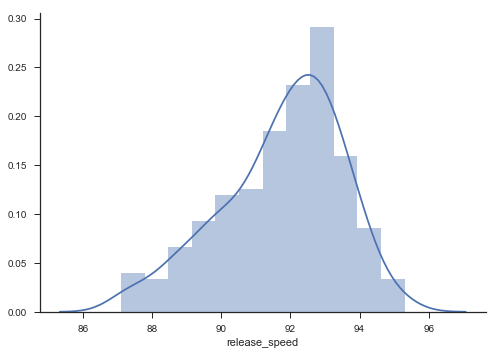

In [83]:
ff_df = bundy_df[bundy_df['pitch_type'] == 'FF']
ax = seaborn.distplot(ff_df['release_speed'])
seaborn.despine()

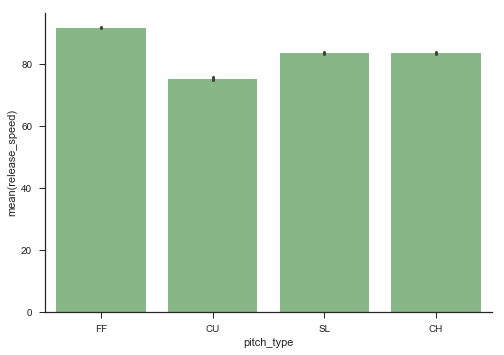

In [84]:
ax = seaborn.barplot(
    x='pitch_type',
    y='release_speed',
    data=bundy_df,
    color='green',
    alpha=0.5,
)
seaborn.despine()

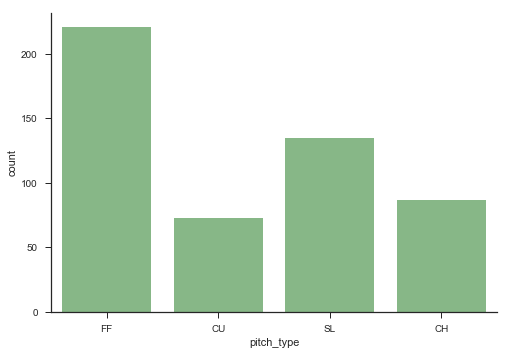

In [85]:
ax = seaborn.countplot(
    x='pitch_type',
    data=bundy_df,
    color='green',
    alpha=0.5,
)
seaborn.despine()

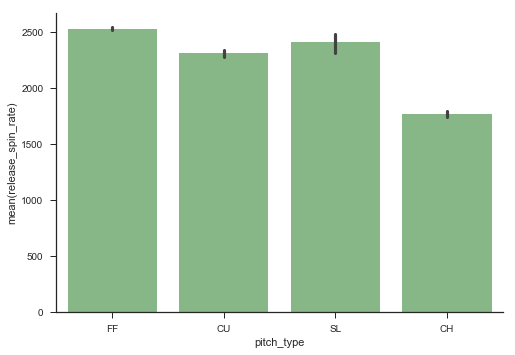

In [86]:
ax = seaborn.barplot(
    x='pitch_type',
    y='release_spin_rate',
    data=bundy_df,
    color='green',
    alpha=0.5,
)
seaborn.despine()

In [87]:
strike_df = bundy_df[bundy_df['description'].str.contains('strike', case=False)]
strike_df = strike_df.assign(pitch_outcome='Strike')

ball_df = bundy_df[bundy_df['description'].str.contains('ball$', case=False)]
ball_df = ball_df.assign(pitch_outcome='Ball')

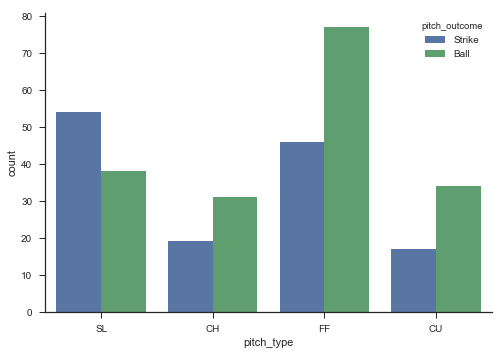

In [88]:
balls_strikes_df = pandas.concat([strike_df, ball_df])

ax = seaborn.countplot(
    x='pitch_type',
    hue='pitch_outcome',
    data=balls_strikes_df
)
seaborn.despine()

In [89]:
judge_df = pandas.read_csv('data/judge.csv', na_values='null')
judge_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value
0,SL,2017-04-30,86.7,-1.7546,5.5831,Aaron Judge,592450,548337,strikeout,swinging_strike,NaN,NaN,NaN,NaN,9.0,Aaron Judge strikes out swinging.,R,R,R,NYY,BAL,S,NaN,NaN,1,2,2017,0.6486,0.1664,0.5870,1.6437,458731.0,595885.0,516770.0,2,10,Bot,NaN,NaN,NaN,NaN,456078.0,NaN,170430_212425,NaN,NaN,NaN,NaN,NaN,NaN,3.8325,1.5818,NaN,NaN,NaN,86.610,2147.0,6.187,490461,548337.0,456078.0,641820.0,570731.0,592518.0,429666.0,572073.0,430945.0,502226.0,54.3105,0.0,0.0,0.0,1.0,0.0,0.0
1,FF,2017-04-30,92.6,-1.5049,5.6951,Aaron Judge,592450,548337,NaN,swinging_strike,NaN,NaN,NaN,NaN,5.0,NaN,R,R,R,NYY,BAL,S,NaN,NaN,1,1,2017,0.9887,1.2985,-0.1299,2.4096,458731.0,595885.0,516770.0,2,10,Bot,NaN,NaN,NaN,NaN,456078.0,NaN,170430_212355,NaN,NaN,NaN,NaN,NaN,NaN,3.8325,1.5818,NaN,NaN,NaN,92.108,2234.0,6.196,490461,548337.0,456078.0,641820.0,570731.0,592518.0,429666.0,572073.0,430945.0,502226.0,54.3012,0.0,0.0,NaN,NaN,NaN,NaN
2,SL,2017-04-30,84.8,-1.8588,5.5382,Aaron Judge,592450,548337,NaN,swinging_strike,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,BAL,S,NaN,NaN,1,0,2017,0.4792,0.2885,0.9578,1.2511,458731.0,595885.0,516770.0,2,10,Bot,NaN,NaN,NaN,NaN,456078.0,NaN,170430_212322,NaN,NaN,NaN,NaN,NaN,NaN,3.8325,1.5818,NaN,NaN,NaN,85.554,2195.0,6.321,490461,548337.0,456078.0,641820.0,570731.0,592518.0,429666.0,572073.0,430945.0,502226.0,54.1762,0.0,0.0,NaN,NaN,NaN,NaN
3,SL,2017-04-30,85.3,-1.7570,5.5642,Aaron Judge,592450,548337,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,BAL,B,NaN,NaN,0,0,2017,0.1279,0.6335,1.5646,1.8968,458731.0,595885.0,516770.0,2,10,Bot,NaN,NaN,NaN,NaN,456078.0,NaN,170430_212256,NaN,NaN,NaN,NaN,NaN,NaN,3.8229,1.5745,NaN,NaN,NaN,85.226,2284.0,6.137,490461,548337.0,456078.0,641820.0,570731.0,592518.0,429666.0,572073.0,430945.0,502226.0,54.3606,0.0,0.0,NaN,NaN,NaN,NaN
4,SL,2017-04-30,80.9,-2.5799,3.4463,Aaron Judge,592450,503285,walk,ball,NaN,NaN,NaN,NaN,14.0,Aaron Judge walks. Starlin Castro to 2nd.,R,R,R,NYY,BAL,B,NaN,NaN,3,1,2017,-0.4144,-0.0984,1.1598,1.8706,NaN,NaN,516770.0,2,9,Bot,NaN,NaN,NaN,NaN,456078.0,NaN,170430_204305,NaN,NaN,NaN,NaN,NaN,NaN,3.8325,1.5818,NaN,NaN,NaN,81.382,2340.0,6.174,490461,503285.0,456078.0,641820.0,570731.0,592518.0,429666.0,572073.0,430945.0,502226.0,54.3238,0.0,0.0,0.7,1.0,0.0,0.0


In [90]:
tb_map = {
    'single': 1,
    'double': 2,
    'triple': 3,
    'home_run': 4,
}
hit_df = judge_df[judge_df['events'].isin(tb_map)]

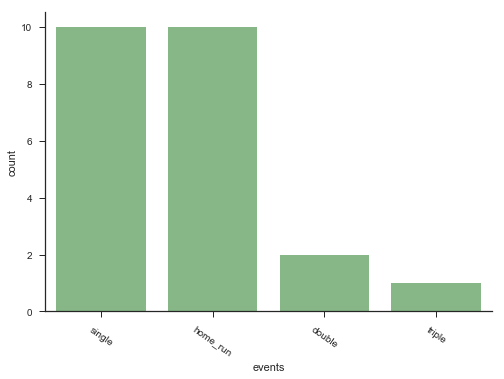

In [91]:
ax = seaborn.countplot(
    x='events',
    data=hit_df,
    color='green',
    alpha=0.5,
)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=-35)
seaborn.despine()

In [92]:
# http://m.mlb.com/glossary/statcast/launch-angle
# http://m.mlb.com/glossary/statcast/exit-velocity
# http://www.fangraphs.com/library/offense/woba
woba_df = pandas.pivot_table(
    judge_df, 
    values='woba_value', 
    index='launch_angle', 
    columns='launch_speed',
    aggfunc=numpy.mean
)
woba_df = woba_df.sort_index(ascending=False)
woba_df.head()

launch_speed,34.8,56.2,65.4,68.8,71.5,76.0,76.2,80.2,80.4,81.3,81.7,81.8,82.9,85.1,85.5,87.0,88.0,90.3,90.5,91.0,97.5,99.8,99.9,100.3,101.2,101.6,102.1,102.7,104.9,106.2,107.5,108.6,109.0,109.7,110.5,110.7,113.5,114.6,115.3,115.5,115.6,115.9,116.5,117.2,119.4
launch_angle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83.933,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


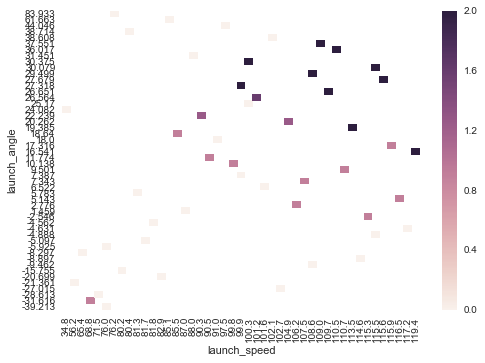

In [93]:
seaborn.set_style(style='whitegrid')

# http://m.mlb.com/glossary/statcast/barrel
ax = seaborn.heatmap(woba_df)

In [94]:
def woba_pivot(df, step=10):
    # Avoid mutating the given DataFrame.
    df = df.copy()

    # Round to the nearest step.
    df['launch_angle_rounded'] = numpy.round(df['launch_angle']/step)*step
    df['launch_speed_rounded'] = numpy.round(df['launch_speed']/step)*step

    woba_df = pandas.pivot_table(
        df, 
        values='woba_value',
        index='launch_angle_rounded',
        columns='launch_speed_rounded',
        aggfunc=numpy.mean
    )

    return woba_df.sort_index(ascending=False)

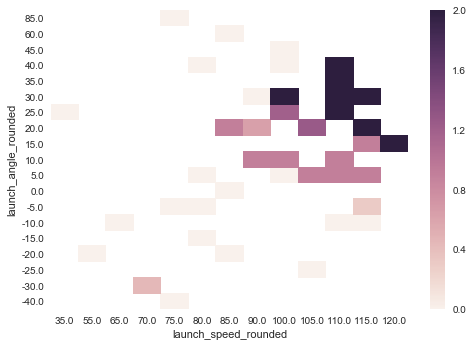

In [95]:
woba_df = woba_pivot(judge_df, step=5)
ax = seaborn.heatmap(woba_df)

In [96]:
na_values = {
    'launch_speed': 'null',
    'launch_angle': 'null',
    'woba_value': 'null',
}
defined_woba_df = pandas.read_csv('data/batters.csv', na_values=na_values)

defined_woba_df = defined_woba_df.dropna(subset=na_values)
defined_woba_df.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value
29970,CU,2017-04-24,74.6,-2.2327,5.9301,Justin Turner,457759,430912,field_out,hit_into_play,NaN,NaN,NaN,NaN,8,Justin Turner flies out to center fielder Drew...,R,R,R,SF,LAD,X,8,fly_ball,1,2,2017,-1.4257,-0.8190,-0.1012,2.2871,null,null,608369.00,1,1,Top,107.10,74.59,NaN,NaN,457763,NaN,170425_021913,NaN,NaN,NaN,NaN,NaN,NaN,3.5290,1.8259,300,81.5,36.679,72.7520,2590,4.7730,490384,430912,457763,474832,605412,624414,543063,456488,453211,452254,55.7285,0.013,0.016,0.0,1,0,0
29971,CH,2017-04-24,82.4,-2.9170,6.0750,Carlos Gomez,460576,461833,field_out,hit_into_play,NaN,NaN,NaN,NaN,4,Carlos Gomez flies out sharply to center field...,R,R,R,TEX,MIN,X,8,fly_ball,0,1,2017,0.9522,0.5461,-0.4910,2.3869,null,null,null,0,1,Bot,101.25,62.43,NaN,NaN,460269,NaN,170425_001515,NaN,NaN,NaN,NaN,NaN,NaN,3.8660,1.6021,330,101.1,45.818,80.4270,924,5.3110,490385,461833,460269,408045,572821,593934,593871,592696,621439,543257,55.1861,0.047,0.086,0.0,1,0,0
29984,CH,2017-04-24,86.4,1.5718,5.8443,Miguel Sano,593934,527048,grounded_into_double_play,hit_into_play,NaN,NaN,NaN,NaN,6,"Miguel Sano grounds into a double play, shorts...",R,R,L,TEX,MIN,X,6,ground_ball,3,2,2017,-1.4513,0.7549,0.5009,2.8002,null,null,572821.00,1,1,Top,116.54,170.06,NaN,NaN,518960,NaN,170425_001221,NaN,NaN,NaN,NaN,NaN,NaN,3.9250,1.6281,85,107.8,3.537,86.4030,1832,5.9530,490385,527048,518960,435063,596059,608336,462101,595777,460576,608577,54.5433,0.634,0.598,0.0,1,0,0
29986,SL,2017-04-24,85.0,-1.0254,6.3834,Wil Myers,571976,425844,field_out,hit_into_play,NaN,NaN,NaN,NaN,9,"Wil Myers grounds out, second baseman Brandon ...",R,R,R,ARI,SD,X,4,ground_ball,1,2,2017,-0.8667,0.0072,0.7792,1.6804,null,null,null,1,1,Top,132.12,166.01,NaN,NaN,425772,NaN,170425_014333,NaN,NaN,NaN,NaN,NaN,NaN,3.6956,1.5148,91,99.1,3.616,83.7580,2498,5.4280,490386,425844,425772,543302,592273,571875,572008,630111,572041,444482,55.0714,0.560,0.524,0.0,1,0,0
29989,FT,2017-04-24,90.1,-0.6775,6.5869,Kevin Kiermaier,595281,434622,field_out,hit_into_play,NaN,NaN,NaN,NaN,6,Kevin Kiermaier pops out to third baseman Mann...,R,L,R,BAL,TB,X,5,popup,2,2,2017,1.4070,1.5151,0.3736,2.9211,null,null,null,0,1,Top,89.64,135.97,NaN,NaN,456078,NaN,170424_231022,NaN,NaN,NaN,NaN,NaN,NaN,3.7871,1.5661,null,80.0,69.000,88.2790,2193,5.4650,490387,434622,456078,448801,570731,592518,429666,547957,430945,452234,55.0321,0.000,0.001,0.0,1,0,0


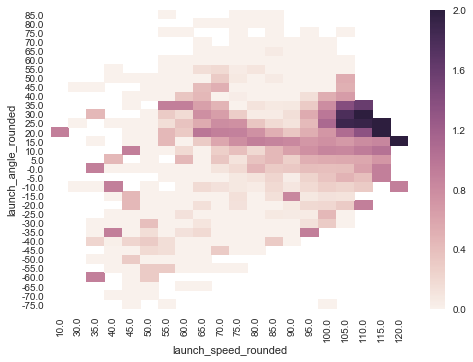

In [97]:
woba_df = woba_pivot(defined_woba_df, step=5)
ax = seaborn.heatmap(woba_df)

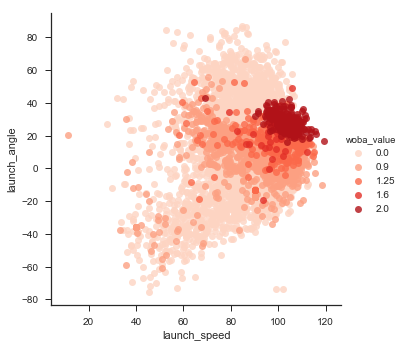

In [98]:
seaborn.set_style(style='ticks')
ax = seaborn.lmplot(
    x='launch_speed',
    y='launch_angle',
    data=defined_woba_df,
    hue='woba_value',
    fit_reg=False,
    palette='Reds'
)